In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [289]:
df=pd.read_csv("insurance.csv")

In [290]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [291]:
df.info()# hence all variables are non-null. info() gives the dtype of all attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [292]:
df.shape # shape of  data type


(1338, 7)

In [293]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [294]:
import seaborn as sns

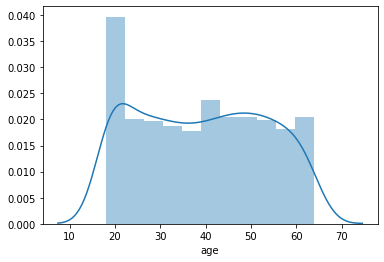

In [295]:
sns.distplot(df['age'])

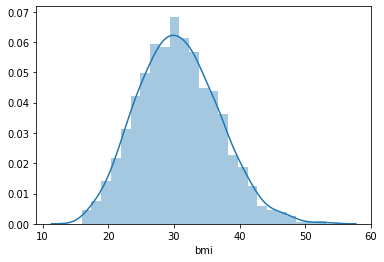

In [296]:
sns.distplot(df['bmi'])# bmi attribute distributed normally

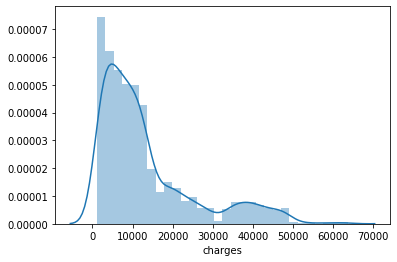

In [297]:
sns.distplot(df['charges'])

In [298]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [299]:
df.skew()# Dataframe.skew( )fun measures the skewness of all attributes in thee dataset

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [300]:
df["age"].skew()

0.05567251565299186

In [301]:
from scipy.stats import skew


In [302]:

print("skewness of age is:",skew(df['age']),"\nskewness of bmi is:",skew(df['bmi']),"\nskewness of charges is:",skew(df["charges"]))


skewness of age is: 0.055610083072599126 
skewness of bmi is: 0.28372857291709386 
skewness of charges is: 1.5141797118745743


In [303]:
# checking the presence of outliers in bmi,age,charges.

In [304]:
from scipy import stats

In [305]:
#sorted(df['age'])

In [306]:
list=[]
def outlier (dataset):
    q1,q3=np.percentile(dataset,[25,75])
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    for i in  dataset:
        if((i<lower) or (i>upper)):
            list=i
            return i
            #print("outliers are:",i)
print("analysis of outliers  in age attribute is: \t",outlier(sorted(df['age'])))
print("analysis of outliers in bmi attribute is :\t",outlier(sorted(df['bmi'])))
print("analysis of outliers in charges attribute is :\t",outlier(sorted(df['charges'])))


analysis of outliers  in age attribute is: 	 None
analysis of outliers in bmi attribute is :	 47.41
analysis of outliers in charges attribute is :	 34617.84065


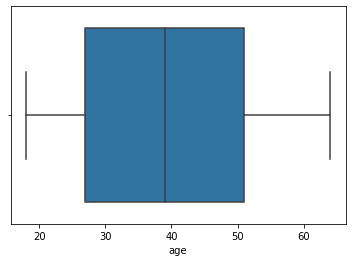

In [307]:
sns.boxplot(df['age'])

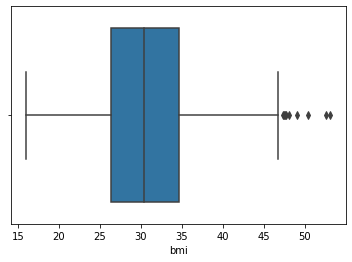

In [308]:
sns.boxplot(df['bmi'])

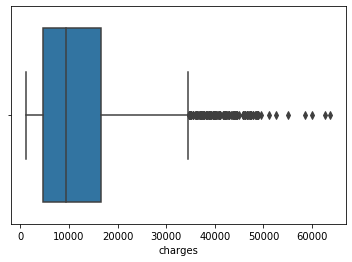

In [309]:
sns.boxplot(df['charges'])

In [310]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [311]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [312]:
df['smoker'].replace({'yes':1,'no':0},inplace=True)
df["sex"].replace({'male':1,'female':0},inplace=True)


In [313]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [314]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [315]:
df["children"].nunique()

6

In [316]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

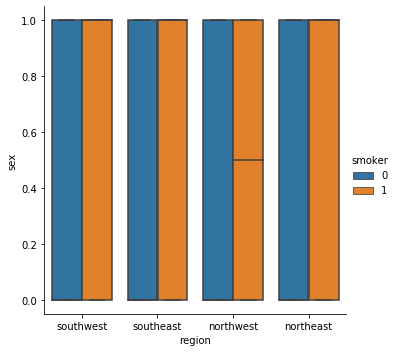

In [317]:
sns.catplot(x="region",y="sex",hue="smoker",data=df,kind="box")

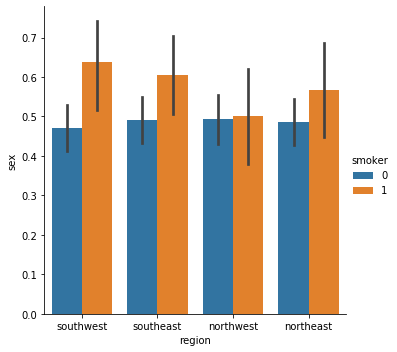

In [318]:
sns.catplot(x="region",y="sex",hue="smoker",data=df,kind="bar")

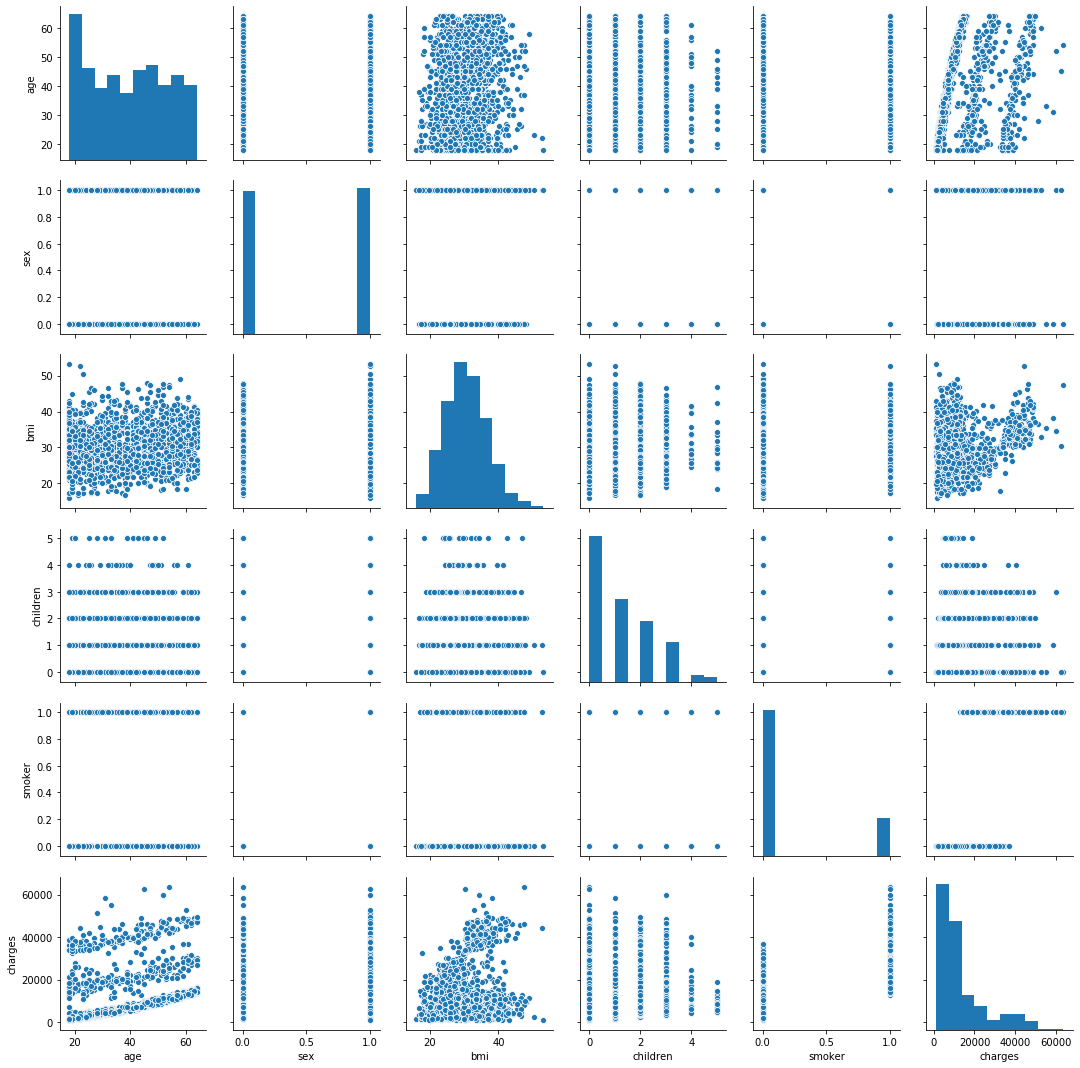

In [319]:
sns.pairplot(df)

In [320]:
# Do charges of people who smoke differ significantly  from the people who don't
#let us take the two samples from dataset,charges(smokers),charges(non-smokers) by EDA

In [321]:
df_non_smoker=df.loc[df["smoker"]==0,["charges"]]

In [322]:
df_non_smoker.head()

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160


In [323]:
df_smoker=df.loc[df["smoker"]==1,["charges"]]

In [324]:
print(df_smoker.head(),"\n\n",df_non_smoker.head())

       charges
0   16884.9240
11  27808.7251
14  39611.7577
19  36837.4670
23  37701.8768 

        charges
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520
5   3756.62160


In [325]:
#we got the two samples by applying the condition (smoker or not) on variable(charges)
#df_smoker(charges for smokers),df_non_smoker(charges for non smokers) are the two indipendent samples.
#apply the two sample t-test by considering that these are in parametric in nature.

In [326]:
from scipy.stats  import ttest_ind

In [327]:
#H0: Do charges of people who smoke not significantly differ  from the people who don't

In [328]:
t_statistic,p_value=ttest_ind(df_smoker,df_non_smoker)

In [329]:
print("the p_value is:\t",p_value)

the p_value is:	 [8.27143584e-283]


In [330]:
#p-value <0.05 hence reject null hypothesis.We can conclude that charges of smokers  are significantly difference from non-smokers 

In [331]:
# Does bmi of males differ significantly from that of  females?  
#take the two samples as males_bmi and females_bmi by EDA

In [332]:
males_bmi=df.loc[df["sex"]==1,["bmi"]]

In [333]:
females_bmi=df.loc[df["sex"]==0,["bmi"]]

In [334]:
print("the males bmi\t ","\n ",males_bmi.head(),"\n\nthe females bmi",females_bmi.head())

the males bmi	  
        bmi
1  33.770
2  33.000
3  22.705
4  28.880
8  29.830 

the females bmi      bmi
0  27.90
5  25.74
6  33.44
7  27.74
9  25.84


In [335]:
t_statistic,p_value=ttest_ind(males_bmi,females_bmi)

In [336]:
#H0:bmi of males are not differ significantly from that of  females

In [337]:
print("the value of t_statistic is:\t",t_statistic,"\n the  P-value is :\t\t",p_value)

the value of t_statistic is:	 [1.69675264] 
 the  P-value is :		 [0.08997637]


In [338]:
#p-value>0.05, hence do not reject the null hypothesis

In [339]:
#Is the proportion of smokers significantly different  in different genders?  
#Here the smokers and genders are categorical variables.hence apply the chisquare test for two samples(Goodness of fit)
#Create a contingency table to pass an orgument of chi2_contingency() function.

In [340]:
#H0: the proportion of smokers are not significantly different  in different genders

In [341]:
from scipy.stats import chi2_contingency

In [342]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [343]:
cont=pd.crosstab(df["smoker"],df["sex"])

In [344]:
print(cont)

sex       0    1
smoker          
0       547  517
1       115  159


In [345]:
chi2_contingency(cont)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

In [346]:
# pvalue is: 0.0065 <0.05, hence reject the null hypothesis.

In [347]:
# Is the distribution of bmi across women with no  children, one child and two children, the same ? 
#

In [348]:
from scipy.stats import levene,shapiro,f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison,pairwise_tukeyhsd

In [372]:
df=df.loc[df["sex"]==0]

In [379]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.92400
5,31,0,25.74,0,0,southeast,3756.62160
6,46,0,33.44,1,0,southeast,8240.58960
7,37,0,27.74,3,0,northwest,7281.50560
9,60,0,25.84,0,0,northwest,28923.13692


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 1337
Data columns (total 7 columns):
age         662 non-null int64
sex         662 non-null int64
bmi         662 non-null float64
children    662 non-null category
smoker      662 non-null int64
region      662 non-null object
charges     662 non-null float64
dtypes: category(1), float64(2), int64(3), object(1)
memory usage: 37.1+ KB


In [377]:
df.children.value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

In [380]:
levene(df[df["children"]==0]["bmi"],df[df["children"]==1]["bmi"],df[df["children"]==2]["bmi"])

LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)

In [352]:
#p value>0.05 ,hence varience of variables are equal which are normally distributed.so It is allowed for ANOVA test.

In [382]:
#shapiro test



df.loc[df["sex"]==0]["children"].unique()

[0, 1, 3, 2, 5, 4]
Categories (6, int64): [0, 1, 3, 2, 5, 4]

In [383]:
shapiro(df[df["children"]==0]["bmi"])

(0.9896312355995178, 0.03757598251104355)

In [384]:
shapiro(df[df["children"]==1]["bmi"])

(0.9921025037765503, 0.5361911654472351)

In [385]:
shapiro(df[df["children"]==2]["bmi"])

(0.9860439300537109, 0.2596229910850525)

In [386]:
#ONE WAY ANOVA
#H0: the distribution of bmi across women with no  children, one child and two children is same 
f_statistic,p_value=f_oneway(df[df["children"]==0]["bmi"],df[df["children"]==1]["bmi"],df[df["children"]==2]["bmi"])

In [387]:
print("one way ANOVA IS \n")
print("f_statistic is:\t",f_statistic,"\np_value is:\t",p_value)


one way ANOVA IS 

f_statistic is:	 0.3344720147757968 
p_value is:	 0.7158579926754841


In [362]:
#p value >0.05, hence do not reject Null hypothesis

In [388]:
mc=MultiComparison(df["bmi"],df["children"])

In [389]:
result=mc.tukeyhsd()

In [391]:
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1  -0.3089   0.9 -2.0232 1.4055  False
     0      2   0.2883   0.9  -1.599 2.1755  False
     0      3   0.0749   0.9 -2.1472  2.297  False
     0      4   1.5817   0.9 -3.7411 6.9044  False
     0      5   0.2591   0.9 -5.9511 6.4693  False
     1      2   0.5971   0.9  -1.506 2.7002  False
     1      3   0.3838   0.9 -2.0244 2.7919  False
     1      4   1.8905   0.9 -3.5126 7.2936  False
     1      5    0.568   0.9 -5.7112 6.8471  False
     2      3  -0.2134   0.9 -2.7475 2.3208  False
     2      4   1.2934   0.9  -4.167 6.7538  False
     2      5  -0.0292   0.9 -6.3577 6.2994  False
     3      4   1.5068   0.9 -4.0782 7.0917  False
     3      5   0.1842   0.9 -6.2522 6.6206  False
     4      5  -1.3226   0.9 -9.3737 6.7286  False
--------------------------------------------------
[0 1 2 3 4 5]


In [366]:
# hence the distribution of bmi across women with no  children, one child and two children is same.

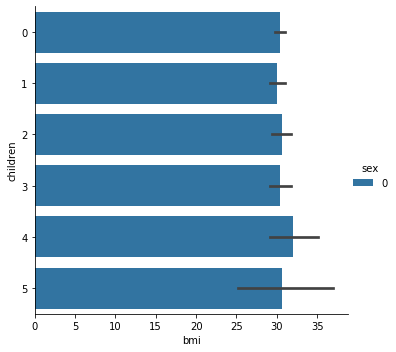

In [392]:
sns.catplot(x="bmi",y="children",hue="sex",data=df,kind="bar")

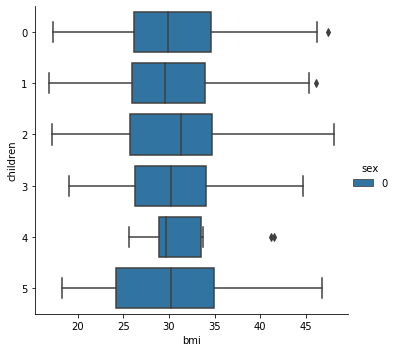

In [393]:
sns.catplot(x="bmi",y="children",hue="sex",data=df,kind="box")